# Assignment 1 - FIT3149

## Part 1 - Model Error

### Part 1.1

Consider the following function $ f(x) = cos(x) $.

This function can be expressed equivalently using an infinite Taylor Series, but since our finite
precision machines cannot evaluate the infinite Taylor Series, we must content ourselves with
truncating the Taylor Series after a finite number of terms and accept a level of error.
Implement a function which approximates cos(x) using a truncated Taylor Series around the
point 0. Compare the accuracy of this function to the inbuilt cos(x) function. Make this
comparison for different levels of accuracy and for different points of interest in the domain

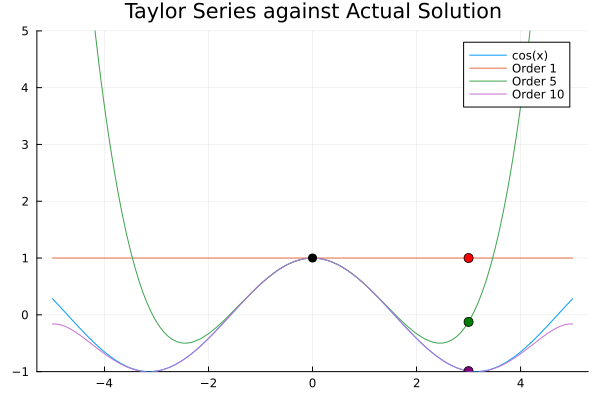

In [1]:
using Symbolics; using Flux; using Plots
@variables x;

function cosTaylorSeries(iter)
    @variables x;
    moduloDerivative = [1, 0, -1, 0]

    p = 0
    
    for n = 0:iter
        p += moduloDerivative[mod(n, 4) + 1] * (1/factorial(n)) * (x^n)
    end
    
    p = eval(build_function(p,x))
    return p
end

f = cos(x)
p_1, p_5, p_10 = cosTaylorSeries(1), cosTaylorSeries(5), cosTaylorSeries(10)

x = range(-5, 5, length=100)
plot(x, f,
    title="Taylor Series against Actual Solution",
    label="cos(x)",
    ylimits=(-1,5),)
plot!(p_1, label="Order 1"); plot!(p_5,label="Order 5"); plot!(p_10,label="Order 10")
scatter!([0], [p_1(0)], color = "black", label = "", markersize = 5)
scatter!([3], [p_1(3)], color = "red", label = "", markersize = 5)
scatter!([3], [p_5(3)], color = "green", label = "", markersize = 5)
scatter!([3], [p_10(3)], color = "purple", label = "", markersize = 5)

From the the plot it can be seen that for every iteration of the the Taylor Expansion, the approximation of $ cos(x) $ improves. It can also been seen that the further x value strays from the point at which the Taylor Series was evaluated at(x=0), the less acurate the approximation is. At x=0 all approximation are equal(y=1). But at x=3 we can see the approximations straying from the actual solution of  $cos(x)$ Exact calculations below.

In [238]:
approx_values = [p_1(0) p_5(0) p_10(0);
                 p_1(3) p_5(3) p_10(3)];

absolute_errors = [cos(0)-p_1(0) cos(0)-p_5(0) cos(0)-p_10(0);
                   cos(3)-p_1(3) cos(3)-p_5(3) cos(3)-p_10(3)];

relative_errors = [abs(absolute_errors[1,1]/cos(0)) abs(absolute_errors[1,2]/cos(0)) abs(absolute_errors[1,3]/cos(0)); 
                   abs(absolute_errors[2,1]/cos(3)) abs(absolute_errors[2,2]/cos(3)) abs(absolute_errors[2,3]/cos(3))];


println("All values represented such that [1st Order, 5th Order, 10th order]")
print("x=0 values: "); println(approx_values[1,:])
print("x=3 values: "); println(approx_values[2,:])
print("x=0 absolute errors against cos(0): "); println(absolute_errors[1,:])
print("x=3 absolute errors against cos(3): "); println(absolute_errors[2,:])
print("x=0 relative errors against cos(0): "); println(relative_errors[1,:])
print("x=3 relative errors against cos(3): "); println(relative_errors[2,:])

All values represented such that [1st Order, 5th Order, 10th order]
x=0 values: [1.0, 1.0, 1.0]
x=3 values: [1.0, -0.125, -0.9910491071428571]
x=0 absolute errors against cos(0): [0.0, 0.0, 0.0]
x=3 absolute errors against cos(3): [-1.9899924966004454, -0.8649924966004454, 0.0010566105424116845]
x=0 relative errors against cos(0): [0.0, 0.0, 0.0]
x=3 relative errors against cos(3): [2.010108665907994, 0.8737364167615008, 0.0010672914653797883]


### Part 1.2

The small angle theorem states that for sufficiently small values of x

$$ cos(x) = 1 − \frac{x^2}{2} $$

How small should x be for this to hold, given a tolerance of a 0.01% relative error? Using
plots and a description explain your results.

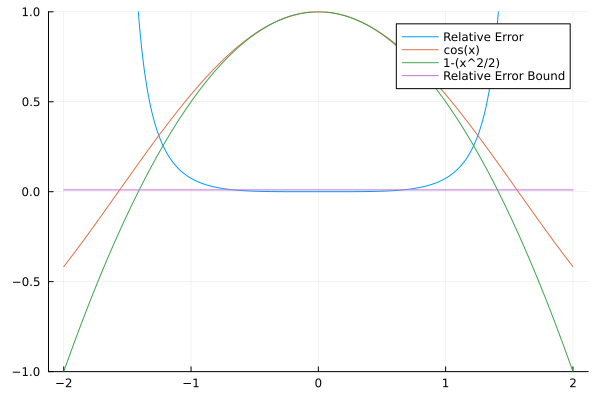

In [4]:
x = range(-2, 2, length=1000)
p_2 = cosTaylorSeries(2)
relative_error(x) = abs(cos(x) - (1-(x^2)/2))/abs(cos(x))
relative_error_bound(x) = 0.01

plot(x, relative_error,
    ylimits=(-1,1),
    label="Relative Error"
)
plot!(x, f,
    label="cos(x)")
plot!(x, p_2,
    label="1-(x^2/2)")
plot!(x, relative_error_bound,
    label="Relative Error Bound")

We can see that for small values of x that the values of $ cos(x) $ and $ 1 − \frac{x^2}{2} $ are almost equal. We can also observe this in the plot of the relative errors between the 2 functions. If were take a 0.01% error as a bound for which we allow this equality then at approximately $ |x| < 0.62 $ we allow this.

### Part 1.3

Repeat parts 1.1 and 1.2 using the $ tan(x) $ function. Explain your results using a description
and plots.

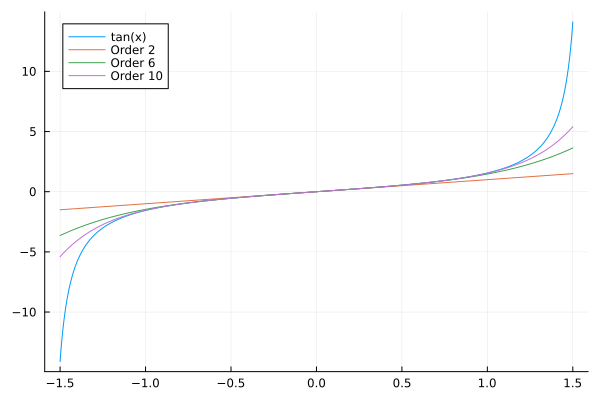

In [2]:
@variables x;

function tanPascalsTriangle(n)
    nthCoefficients = [0; 1]
    zeroOrderCoefficients = [0]
    
    for i = 1:n
        temp = zeros(size(nthCoefficients,1) + 1)
        for j = 2:i+1
            # Adds the coefficients at ith derivative each side of it in the n+1th coefficients
            temp[j-1] += (j-1) * nthCoefficients[j]
            temp[j+1] += (j-1) * nthCoefficients[j]
        end
        nthCoefficients = temp
        # Add the the zeroth order coefficient as this is relevant to the taylor series.
        append!(zeroOrderCoefficients, nthCoefficients[1])
    end

    return zeroOrderCoefficients
end

function tanTaylorSeries(iter)
    @variables x;
    coefficients = tanPascalsTriangle(iter)

    p = 0
    
    for n = 0:iter
        p += coefficients[n+1] * (1/factorial(n)) * (x^n)
    end

    # print(p)

    p = eval(build_function(p,x))
    return p
end

g = tan(x)
t_2, t_6, t_10= tanTaylorSeries(2), tanTaylorSeries(6), tanTaylorSeries(10)

x = range(-1.5, 1.5, length=1000)
plot(x, g,
    label="tan(x)")
plot!(t_2, label="Order 2"); plot!(t_6, label="Order 6"); plot!(t_10, label="Order 10")

Here you can see that just like the approximation of $ cos(x) $ the approximation of $ tan(x) $ gets better with every iteration of the Taylor Series.

For the small angle theorom, the equality for small values of x then $ tan(x) = x $, this can be seen with the graph below

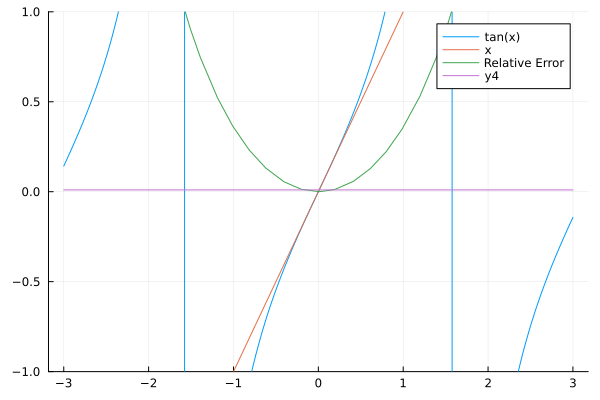

In [5]:
x_(x) = x
relative_error(x) = abs(tan(x) - x)/abs(tan(x))

x = range(-3, 3, length=1000)
plot(x, g,
    label="tan(x)",
    ylimits=(-1,1))
plot!(x_, label="x")
plot!(relative_error, label="Relative Error")
plot!(relative_error_bound)

### Part 2 - Data Error

The number $ π $ is a trascendental number, and cannot be stored in a finite precision machine.
As a result, it is rounded after a finite number of decimal places.
Explore how the accuracy of the function $ f(x) = cos(2πx) $ is affected by rounding π to
various degrees of precision. Assume that your computer’s inbuilt π value is a sufficiently
accurate approximation of $ π $.

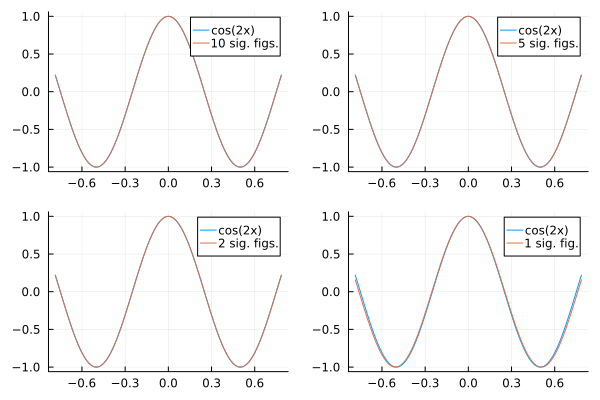

In [6]:
x = range(-pi/4, pi/4, length=1000)
cosExact(x) = cos(2*pi*x)
cosApprox_10(x) = cos(2*round(pi, digits=10)*x)
cosApprox_5(x) = cos(2*round(pi, digits=5)*x)
cosApprox_2(x) = cos(2*round(pi, digits=2)*x)
cosApprox_1(x) = cos(2*round(pi, digits=1)*x)

relative_error(x) = abs(cos(2*pi*x)- cos(2*round(pi, digits=1)*x))/abs(cos(2*pi*x))

p1 = plot(x, cosExact, label="cos(2x)")
plot!(cosApprox_10, label="10 sig. figs.")
p2 = plot(x, cosExact, label="cos(2x)")
plot!(cosApprox_5, label="5 sig. figs.")
p3 = plot(x, cosExact, label="cos(2x)")
plot!(cosApprox_2, label="2 sig. figs.")
p4 = plot(x, cosExact, label="cos(2x)")
plot!(cosApprox_1, label="1 sig. fig.")
plot(p1,p2,p3,p4, layout = (2,2))

With the graphs centred around zero it can be seen that for the most parts the graphs of all pi approximations are relatively close to the actual solution. However it can be seen that rounded to 1 significant figure there is some deviation from the actual solution that can be observed from the the figure.

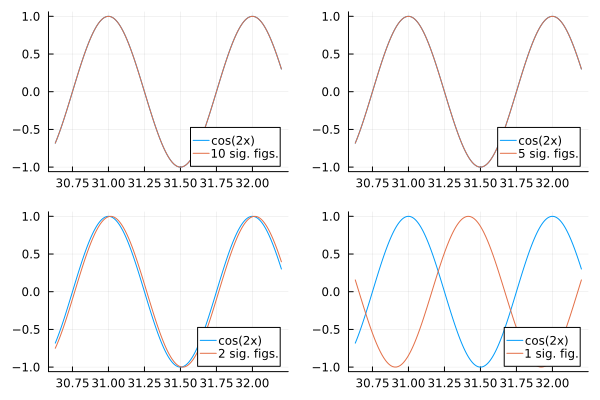

In [7]:
x = range((-pi/4)+10*pi, (pi/4)+10*pi, length=10000)

p1 = plot(x, cosExact, label="cos(2x)")
plot!(cosApprox_10, label="10 sig. figs.")
p2 = plot(x, cosExact, label="cos(2x)")
plot!(cosApprox_5, label="5 sig. figs.")
p3 = plot(x, cosExact, label="cos(2x)")
plot!(cosApprox_2, label="2 sig. figs.")
p4 = plot(x, cosExact, label="cos(2x)")
plot!(cosApprox_1, label="1 sig. fig.")
plot(p1,p2,p3,p4, layout = (2,2))

As we pertubate further from the origin, we can see a complete deviation from the original function in the 1 significant figure approximation and a percieved deviation in the 2 significant figure plot.

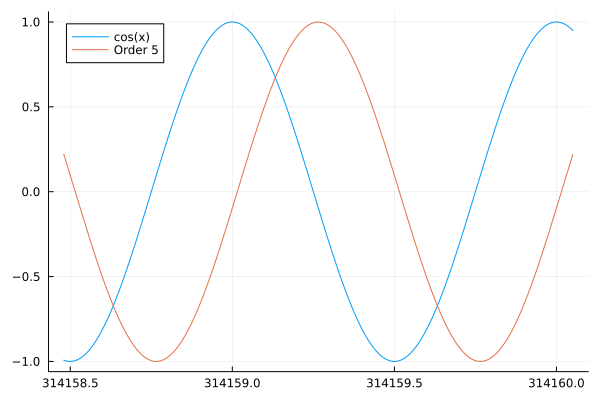

In [11]:
x = range((-pi/4)+100000*pi, (pi/4)+100000*pi, length=1000)

plot(x, cosExact, label="cos(x)")
plot!(cosApprox_5, label="Order 5")

x perturbated even further shows that the 5 significant figure approximation deviates over a certain time.

### Task 3 - Sensitiviy and condition number

Evaluate the sensitivity of the function $ f(x) = cos(2πx) $ function in two ways. First, by
computing the relative forward and relative backward errors and inspecting their ratio. Sec-
ond, by using the approximation formula that relies on the derivative of f . Explore different
regions of the domain

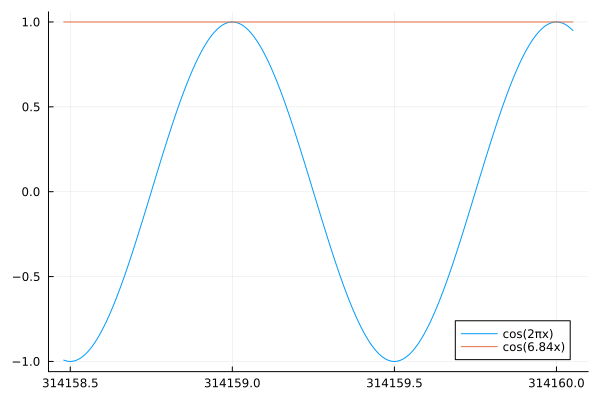

In [12]:
approx(x) = p_1(2*round(pi, digits=3)*x)

plot(x, cosExact, label="cos(2πx)")
plot!(approx,label="cos(6.84x)")

From the above plot we can see the difference in the approximating version of $ cos(2πx) $ lets call it $ q(x) $ and the exact solution. If we graph the relative forward error, we can see the cyclic pattern that occurs. 

Now if we consider the backwards error, that being $ \Delta x\  s.t  \cos(x + \Delta x) = q(x) $

By both niavely look at the plot or Algebriac manipulation, it can be found that: $$ \Delta x = -x $$

From this we can also gather the fact that our relative backward error $ |\frac{x}{\Delta x}| $  is simply 1.

Therefore the condition number is the relative forward error.

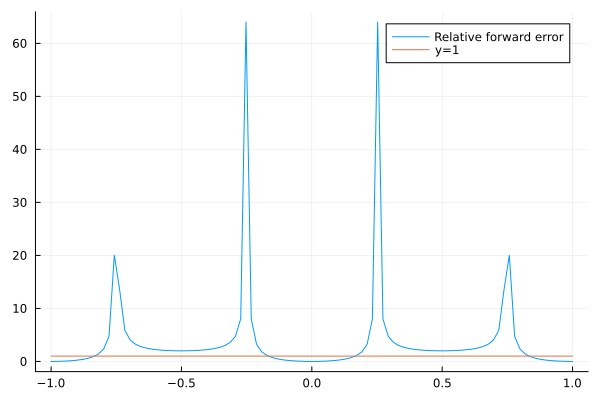

In [13]:
x = range(-1, 1, length=100)

rel_forward_error(x) = abs(cos(2*pi*x) - 1)/abs(cos(2*pi*x))
constOne(x) = 1
plot(x, rel_forward_error, label="Relative forward error")
plot!(constOne, label="y=1")

From the graph of the we can see the points for which the problem is well-conditioned, based on all y-values that exist below the red line. The blue line follows the cyclic pattern akin to the values that are showed in the plot.

We can also approximate the condition number based on the derivative of the function with the formula:

$$ |\frac{xf'(x)}{f(x)}| $$ 

Using the corresponding function results in the approximation

$$ |-\frac{sin(x)}{cos(x)}| $$ 

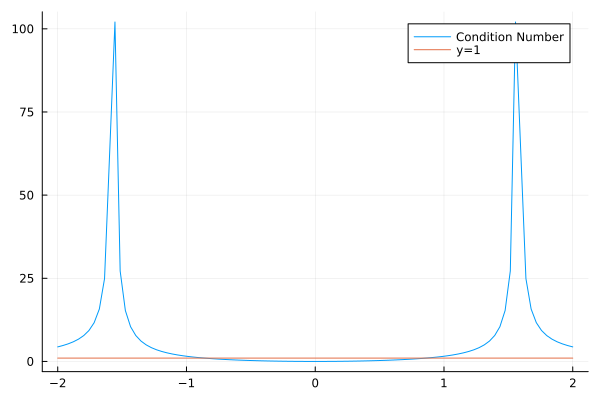

In [15]:
x = range(-2, 2, length=100)
conditionNumberApprox(x) = abs(x*sin(x)/cos(x))
plot(x, conditionNumberApprox, label="Condition Number")
plot!(constOne, label="y=1")